In [1]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# vamos criar uma zona de incerteza no intervalo [0.4 , 0.6)

def class_name(pred):
    if pred<0.4:
        return "gato"
    elif pred<0.6:
        return "não consegui identificar o que é isso"
    else:
        return "cachorro"       
  

In [3]:
# para ler a rede Cats&Dogs de volta

from tensorflow.keras.models import model_from_json

# load json and create model
json_file = open('dogscats_v5.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("dogscats_v5.weights.h5")
print("Loaded model from disk")

model=loaded_model

# a partir daqui é só comandar model.compile e model.fit

Loaded model from disk


In [4]:
size = 128

# Define the function to preprocess an image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.convert('L')  # Convert image to grayscale
    image = image.resize((size, size))  
    image = np.array(image)
    image = image.astype('float32')
    image /= 255.0
    image = (image - 0.5) * 2.0  # Apply contrast enhancement
    return image
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━

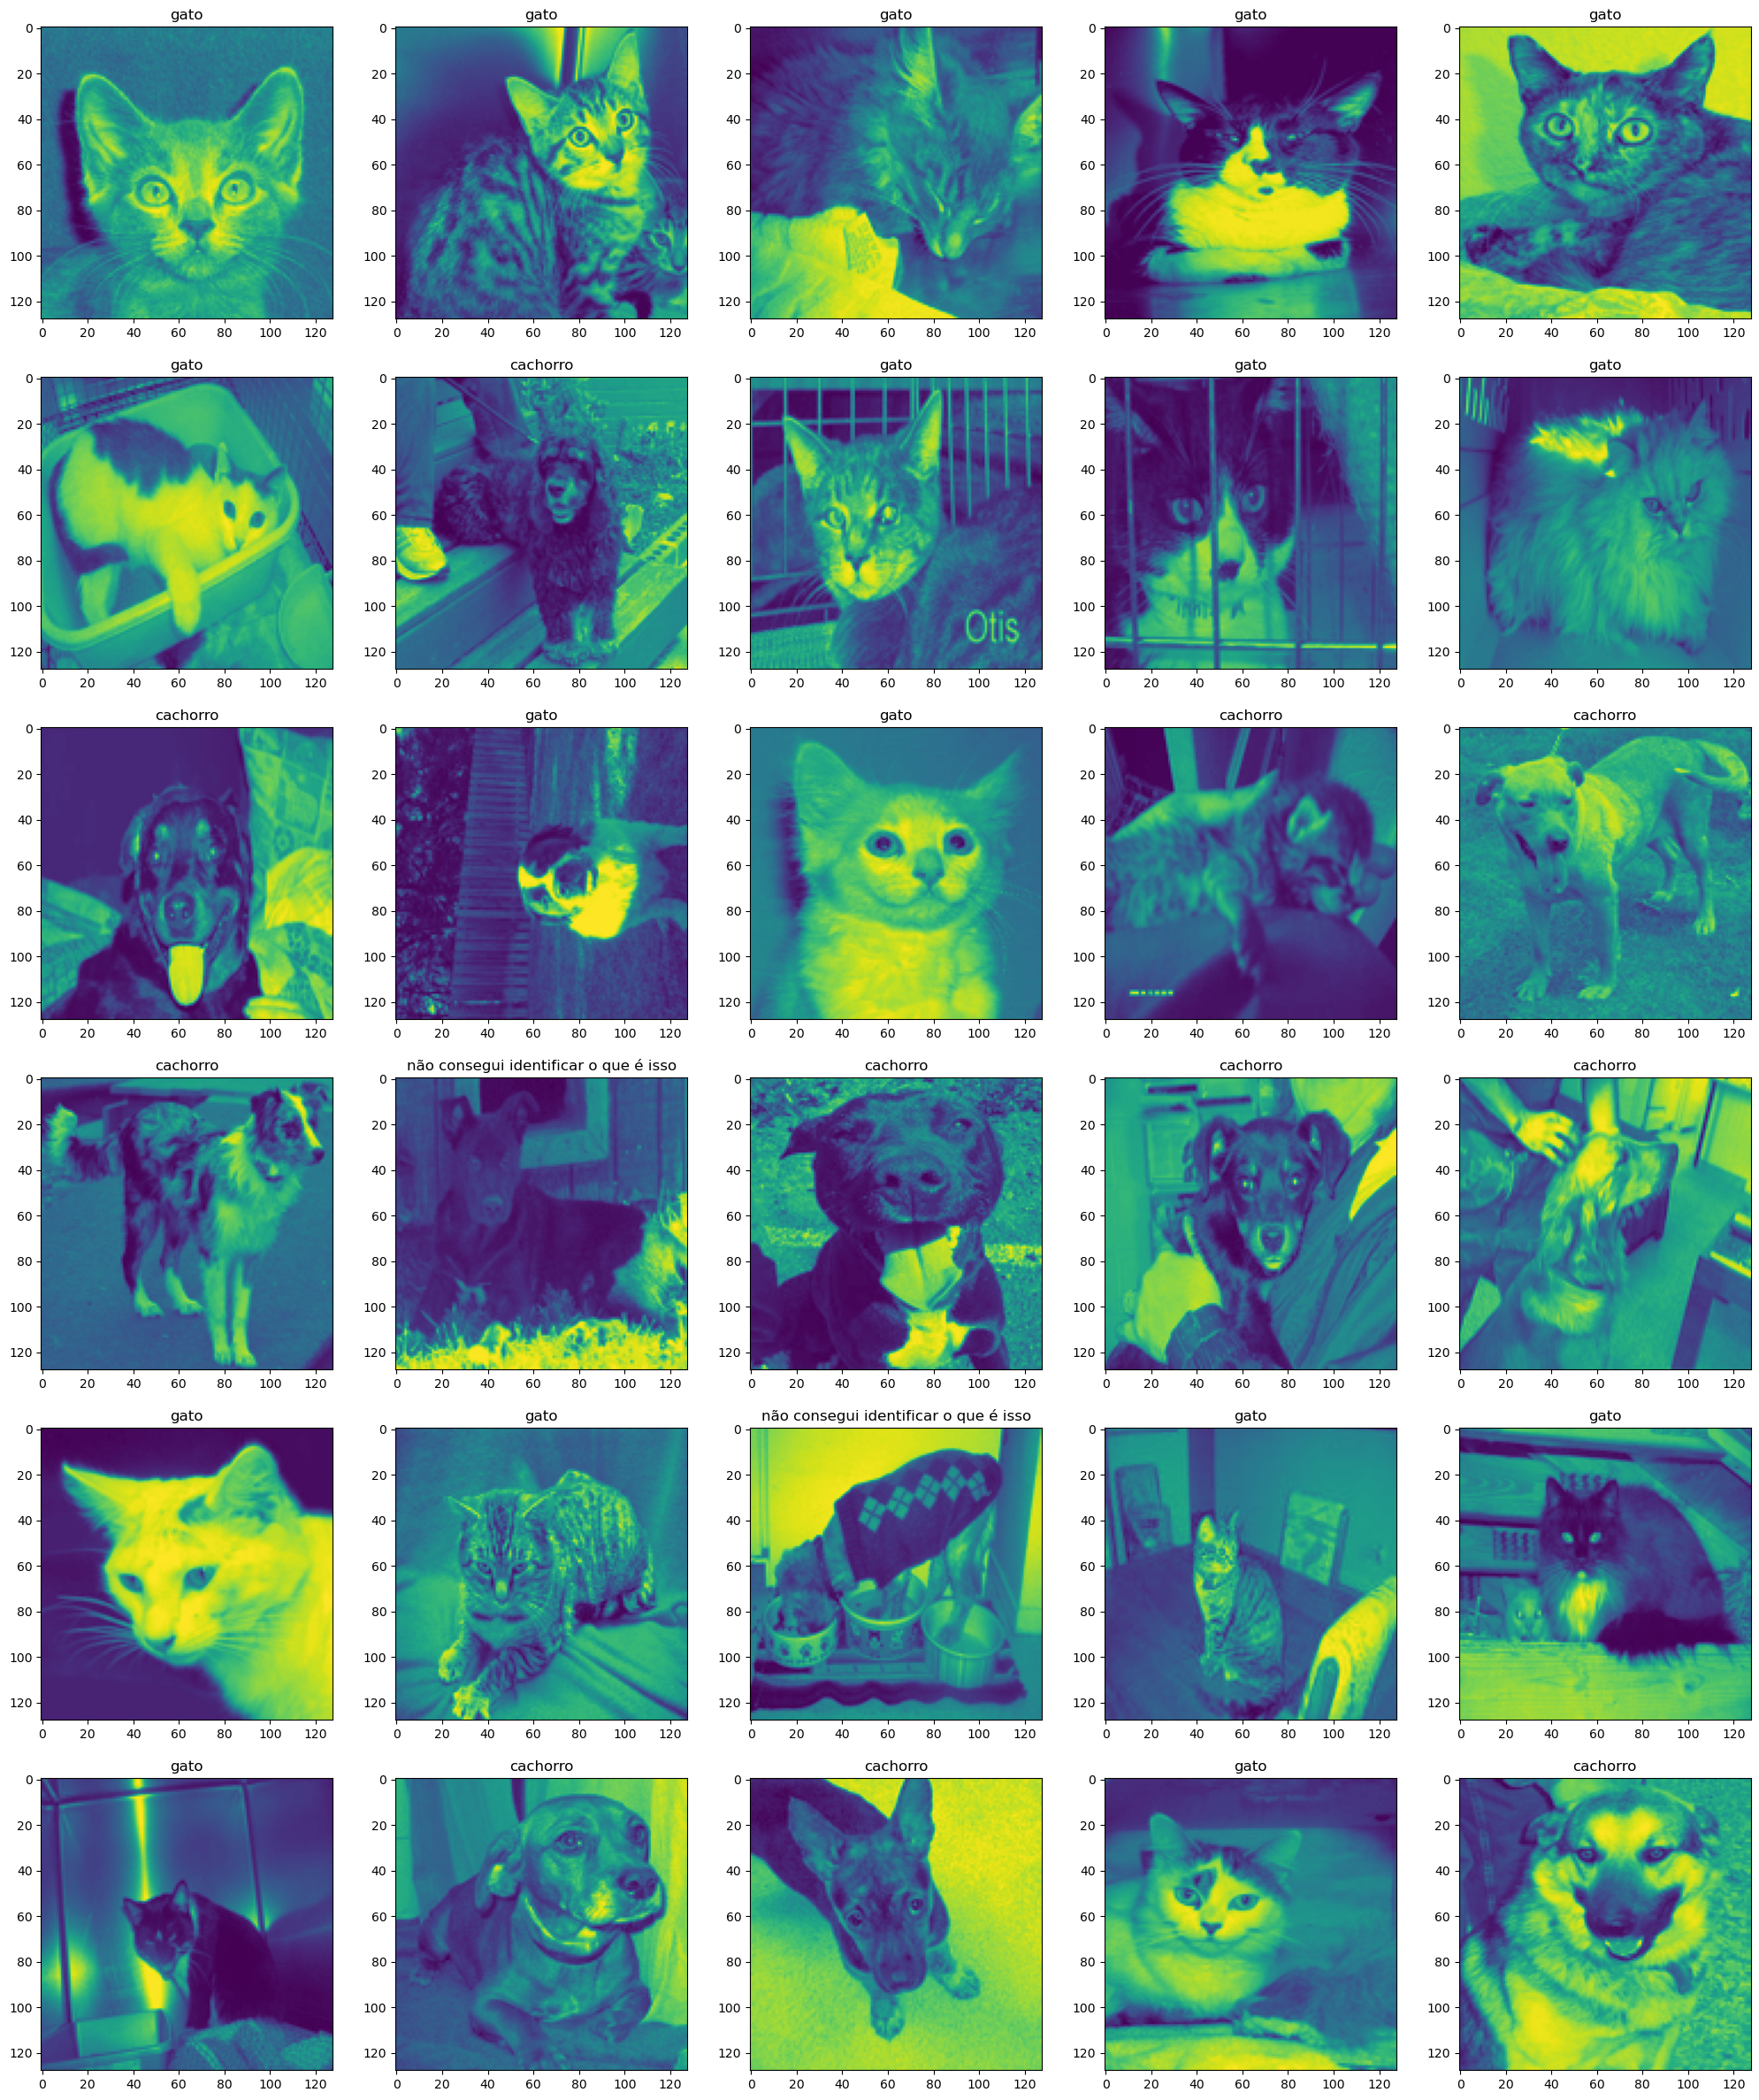

In [5]:
# verificando com dados de teste
import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=[25,30])

for i in range (0,30):
    n = np.random.randint(0, 12500)
    arquivo = 'Base de dados/test/'+str(n)+'.jpg'
    
    X_test = preprocess_image(arquivo)
    
    # processamento com a rede Cats & Dogs
    pred = model.predict(tf.expand_dims(X_test, 0))
    plt.subplot(6,5,i+1)
    plt.imshow(X_test)
    
    plt.title(class_name(pred))
    
plt.show()


In [6]:
def verifica_imagem (arquivo):
    print(arquivo)
    image = preprocess_image(arquivo)
    pred = model.predict(tf.expand_dims(image, 0))
    plt.imshow(image)
    print(pred)
    print(class_name(pred))

yoda.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[0.99999994]]
cachorro


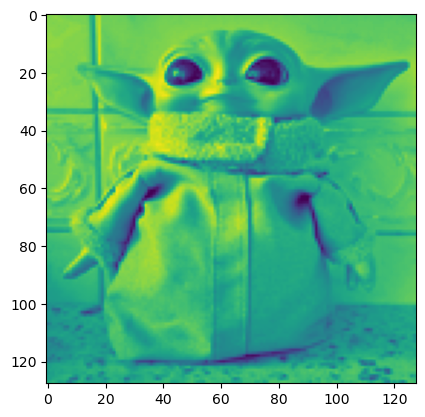

In [7]:
verifica_imagem('yoda.jpg')

dog_teste_1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.9999347]]
cachorro


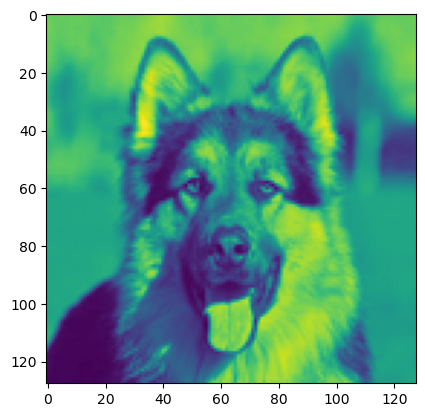

In [8]:
verifica_imagem('dog_teste_1.jpg')

gato_teste_1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.05387641]]
gato


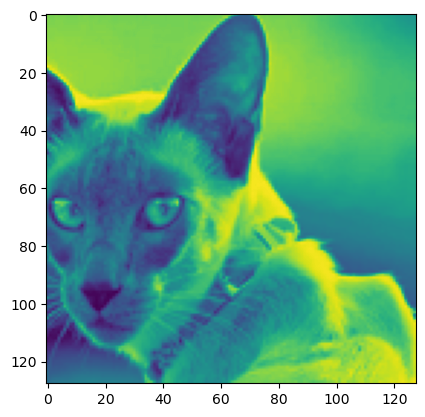

In [9]:
verifica_imagem('gato_teste_1.jpg')

elefante_teste.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.5202527]]
não consegui identificar o que é isso


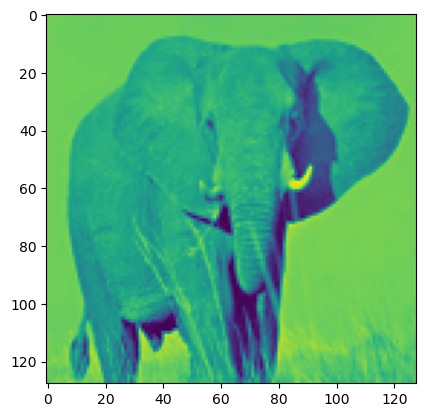

In [10]:
verifica_imagem('elefante_teste.jpg')